# Face Recognition

In [1]:
from sklearn import datasets
from sklearn.metrics import mean_squared_error
faces = datasets.fetch_olivetti_faces()
faces.data.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


(400, 4096)

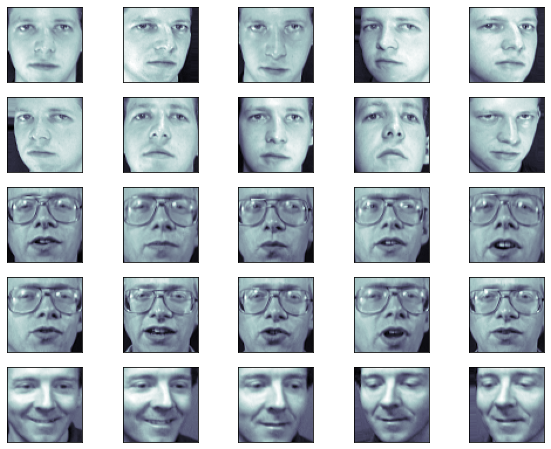

In [2]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 8))
# plot several images
for i in range(25):
  ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=0)
print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


# Without PCA

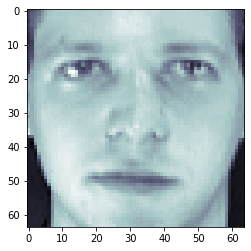

In [4]:
plt.imshow(faces.images[0],
cmap=plt.cm.bone)

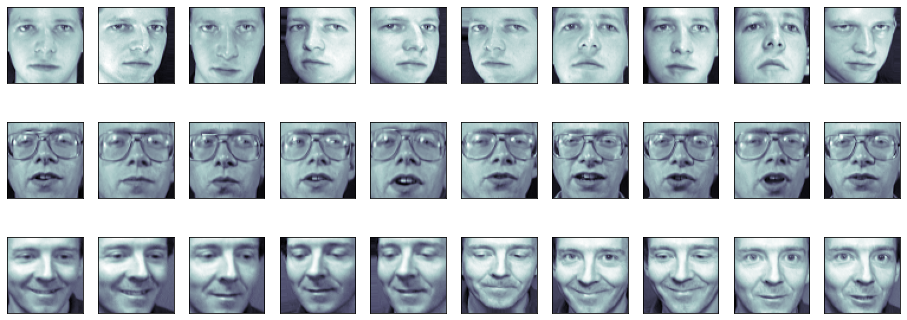

In [5]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
  ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(faces.images[i],cmap=plt.cm.bone)

In [6]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [7]:
y_pred = gnb.predict(X_test)
y_pred

array([13, 30, 34, 19, 24,  6, 15, 26, 14, 21,  3, 13, 11, 34,  1,  5, 20,
       14, 20, 19,  9,  3, 12, 16, 39, 31,  3,  1, 28, 10,  9, 30, 33, 22,
        6,  7,  9,  3,  9, 39, 10, 32, 15,  9, 20,  5, 37,  2, 15, 23, 39,
       14, 20,  9, 28, 31,  5,  3, 39,  4,  7, 27,  9, 35, 19, 37, 14,  0,
       15, 31,  0, 26,  6,  2, 10,  3, 36, 30, 36, 32, 33,  6,  5, 10, 30,
       22, 12, 37,  4, 32, 38, 25,  5,  0, 19, 14, 13, 39, 12, 36])

In [8]:
y_test

array([13, 30, 34, 19, 24,  6, 15, 26, 14, 21,  3, 13, 11, 34,  1,  5, 29,
       14, 20, 19, 17, 26, 12, 34, 17, 31,  7,  1, 28, 10, 17, 30, 33, 22,
        6,  7,  9, 17, 17, 39, 10, 32,  0,  0, 29,  5, 37, 25, 15, 23, 24,
       14, 29, 17, 28, 31,  5,  1,  2,  4,  7, 27,  0, 35, 19, 37, 14,  0,
       15, 31,  0, 26,  6,  2, 10,  1, 36, 30, 36, 32, 33,  6,  5, 10, 30,
       22, 12, 37, 39, 32, 38, 25,  5,  0, 19, 14, 13, 39, 26, 36])

In [9]:
mean_squared_error(y_test, y_pred)

59.87

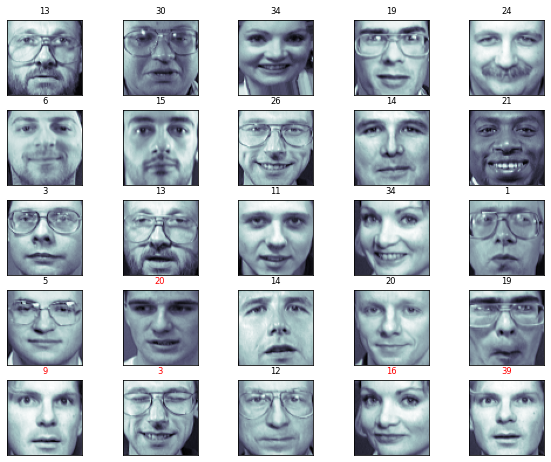

In [10]:
import numpy as np
fig = plt.figure(figsize=(10, 8))
for i in range(25):
  ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(faces.images[0].shape),cmap=plt.cm.bone)

  y_pred = gnb.predict(X_test[i, np.newaxis])[0]
  color = ('black' if y_pred == y_test[i] else 'red')
  ax.set_title(y_pred, fontsize='small', color=color)

In [11]:
from sklearn import metrics
y_pred = gnb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       1.00      0.50      0.67         4
           2       0.50      0.50      0.50         2
           3       0.17      1.00      0.29         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       0.14      1.00      0.25         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.75      1.00      0.86         3
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         6
          19       1.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [12]:
print(metrics.confusion_matrix(y_test, y_pred))

[[3 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 1]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


# Preprocessing: Principal Component Analysis

In [13]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

In [14]:
faces.images[0].shape

(64, 64)

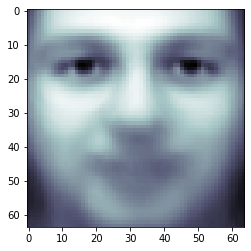

In [15]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),
cmap=plt.cm.bone)

In [16]:
print(pca.components_.shape)

(150, 4096)


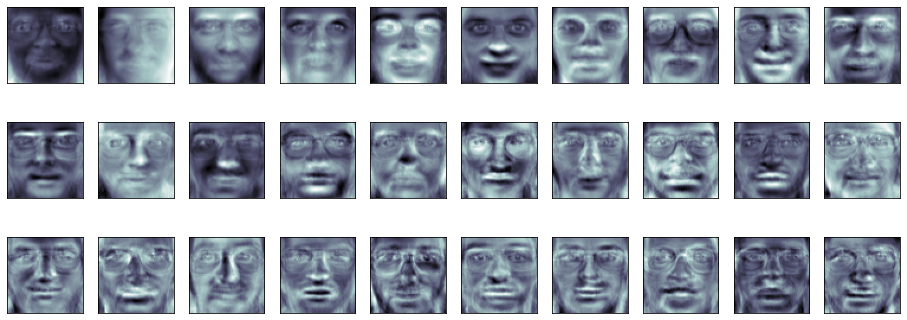

In [17]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
  ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(pca.components_[i].reshape(faces.images[0].shape),cmap=plt.cm.bone)

In [18]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(300, 150)


In [19]:
print(X_test_pca.shape)

(100, 150)


In [20]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)

GaussianNB()

In [21]:
y_pred = gnb.predict(X_test_pca)
y_pred

array([13, 30, 34, 19, 24,  6, 15, 26, 14, 21,  3, 13, 11, 34,  1,  3, 29,
       14, 20, 19,  3, 16, 12, 34,  9, 31, 35,  1, 28, 10,  3, 30, 33, 22,
        6,  7,  9,  3,  9, 39, 10, 32, 15,  0, 29,  3, 37,  2, 15, 23, 24,
       14, 29,  3, 28, 31,  5,  1,  9,  4,  7, 27, 31, 35, 19, 37, 14,  3,
       15, 31, 11, 26,  6,  2, 10,  3, 36, 30, 36, 32, 33,  6,  5, 10, 30,
       22, 12, 37, 39,  9, 38, 25,  5, 35,  3, 14, 13, 39, 12, 36])

In [22]:
y_test

array([13, 30, 34, 19, 24,  6, 15, 26, 14, 21,  3, 13, 11, 34,  1,  5, 29,
       14, 20, 19, 17, 26, 12, 34, 17, 31,  7,  1, 28, 10, 17, 30, 33, 22,
        6,  7,  9, 17, 17, 39, 10, 32,  0,  0, 29,  5, 37, 25, 15, 23, 24,
       14, 29, 17, 28, 31,  5,  1,  2,  4,  7, 27,  0, 35, 19, 37, 14,  0,
       15, 31,  0, 26,  6,  2, 10,  1, 36, 30, 36, 32, 33,  6,  5, 10, 30,
       22, 12, 37, 39, 32, 38, 25,  5,  0, 19, 14, 13, 39, 26, 36])

In [23]:
mean_squared_error(y_test, y_pred)

59.08

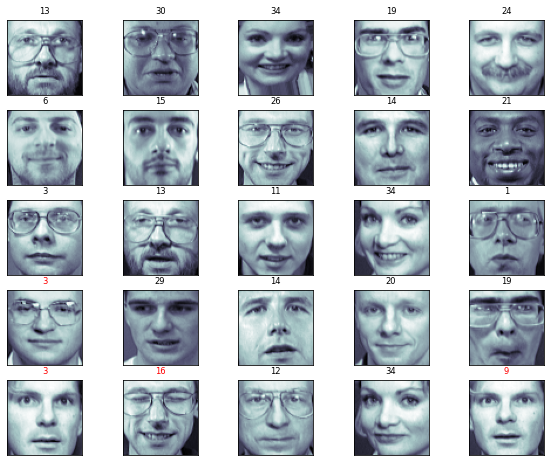

In [24]:
import numpy as np
fig = plt.figure(figsize=(10, 8))
for i in range(25):
  ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(faces.images[0].shape),cmap=plt.cm.bone)

  y_pred = gnb.predict(X_test_pca[i, np.newaxis])[0]
  color = ('black' if y_pred == y_test[i] else 'red')
  ax.set_title(y_pred, fontsize='small', color=color)

In [25]:
from sklearn import metrics
y_pred = gnb.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       1.00      0.75      0.86         4
           2       0.50      0.50      0.50         2
           3       0.10      1.00      0.18         1
           4       1.00      1.00      1.00         1
           5       1.00      0.60      0.75         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       0.20      1.00      0.33         1
          10       1.00      1.00      1.00         4
          11       0.50      1.00      0.67         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.75      1.00      0.86         3
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         6
          19       1.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [26]:
print(metrics.confusion_matrix(y_test, y_pred))

[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


**Pipelining**

In [27]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=150, whiten=True)),

('gnb', GaussianNB())])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()

[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


# IRIS Dataset

In [28]:
from sklearn import datasets
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

df = datasets.load_iris()
df.data.shape

(150, 4)

In [29]:
df.target.shape

(150,)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.2, random_state=77)
print(X_train.shape, X_test.shape)

(120, 4) (30, 4)


**Without PCA**

In [31]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [32]:
y_pred = gnb.predict(X_test)
y_pred

array([1, 1, 2, 1, 0, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 2, 2, 2, 0, 1, 0, 2,
       2, 1, 1, 1, 2, 0, 1, 1])

In [33]:
y_test

array([1, 2, 2, 1, 0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 0, 2, 2, 2, 0, 1, 0, 2,
       2, 1, 1, 1, 2, 0, 1, 2])

In [34]:
mean_squared_error(y_test, y_pred)

0.13333333333333333

In [35]:
from sklearn import metrics
y_pred = gnb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.67      1.00      0.80         8
           2       1.00      0.69      0.82        13

    accuracy                           0.87        30
   macro avg       0.89      0.90      0.87        30
weighted avg       0.91      0.87      0.87        30

